In [1]:
%matplotlib inline

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (20, 10)
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import LabelEncoder

# Predicting Sofia real estate prices

The project is focused on predicting real estate prices in Sofia, Bulgaria. With the growing interest in the real estate market and increasing complexity of property values, our goal is to leverage historical data to forecast future prices. Understanding and predicting real estate prices can provide valuable insights for buyers, sellers, investors, and policymakers.

The real estate market in Sofia, Bulgaria, is constantly changing. Understanding how property prices are influenced and predicting future values is important for everyone involved in buying, selling, or investing in real estate. This project aims to forecast property prices in Sofia using historical data to help people make better decisions in the real estate market.

By analyzing past transactions and key factors that affect property values—such as location, size, and property features—we will develop a model to predict future prices. My goal is to provide clear, accurate predictions that can guide buyers, sellers, and investors in making informed choices.

This project is a significant step towards improving my understanding of Sofia’s real estate market. With the help of data-driven insights, I hope to make it easier for people to navigate the complexities of property pricing and find valuable opportunities in the market.

### The goals of the project:
- To understand the key drivers of real estate prices in Sofia.
- To build and evaluate a machine learning model that can predict property prices.

### Why this problem is important?

__1. Importance for Investors__: <br/>
- Maximizing Returns: Real estate is one of the most significant and stable forms of investment. Investors rely on accurate price predictions to identify undervalued properties, time their purchases, and decide on the most profitable resale opportunities. By predicting future prices, investors can optimize their portfolios, maximize returns, and mitigate risks.
- Market Timing: For investors, knowing when to buy or sell is crucial. Accurate price predictions can help investors time the market effectively, allowing them to buy properties before prices increase and sell before a downturn. This timing can significantly affect the profitability of real estate investments.
- Diversification and Risk Management: Understanding price trends in different neighborhoods or property types allows investors to diversify their portfolios. They can spread their investments across various segments of the market, reducing the risk of exposure to price volatility in any single area.

__2. Importance for Homebuyers:__ <br/>
- Affordability and Budgeting: For most people, buying a home is the largest financial commitment they will make in their lifetime. Predicting future prices helps homebuyers understand market trends, ensuring they purchase at the right time to get the best value for their money. It also helps them budget accurately for future financial planning, such as mortgage payments and maintenance costs.
- Avoiding Overpayment: Accurate predictions can prevent homebuyers from overpaying in a competitive market. By understanding the fair value of properties, buyers can make informed decisions, avoid bidding wars, and negotiate better deals.
- Long-term Financial Planning: Homebuyers need to consider the long-term value of their investment. Predictions about property prices can guide them in choosing neighborhoods with strong potential for appreciation, ensuring that their home not only meets their immediate needs but also grows in value over time.

__3. Importance for Urban Planners and Policy Makers:__ <br/>
- Sustainable Urban Development: Urban planners rely on real estate price predictions to make informed decisions about zoning, infrastructure development, and public services. By understanding where prices are likely to rise, planners can allocate resources efficiently, ensuring sustainable growth and avoiding overdevelopment or underdevelopment in specific areas.
- Economic Policy and Housing Affordability: Accurate price predictions are crucial for developing policies that address housing affordability and social equity. Policymakers can use these predictions to implement measures such as affordable housing initiatives, rent controls, and tax incentives to stabilize markets and prevent housing bubbles.
- Infrastructure Planning: Understanding future real estate trends helps in planning for infrastructure needs, such as transportation, schools, and healthcare facilities. By anticipating areas of growth, urban planners can ensure that necessary services are in place to support population increases, thereby enhancing the quality of life for residents.

__4. Importance for the Broader Economy:__ <br/>
- Economic Stability: The real estate market is a significant component of the economy. Price fluctuations can impact consumer spending, banking stability, and overall economic health. Accurate predictions help prevent housing market bubbles, which, if left unchecked, could lead to economic recessions, as seen in the 2008 financial crisis (Global Financial Crisis (GFC) ).
- Employment and Industry Growth: The construction, finance, and retail sectors are closely tied to the real estate market. Predicting price trends allows businesses in these industries to plan for demand, hire appropriately, and make investments in their operations, contributing to overall economic growth.

In summary, real estate price prediction is a critical tool for a wide range of stakeholders. It empowers investors to maximize returns, enables homebuyers to make informed decisions, assists urban planners in managing growth sustainably, and supports policymakers in maintaining economic stability. Accurate predictions contribute to the health and efficiency of the real estate market and, by extension, the broader economy.

## Description of Datasets:
The websites that I used: __https://www.imoti.net/bg__  and __https://www.imot.bg/__ .


### Dataset 1: Historical Real Estate Prices from imoti.net
Description: This dataset provides historical real estate price data from imoti.net, including the following details:

- Location: The area or district where the property is located.
- Total Price (EUR): The overall cost of the property.
- Price per Square Meter (EUR/m²): The cost per square meter of the property.
- Property Type: The type of property (e.g., apartment, house, commercial).
- Date: The date when the price data was recorded.

### Dataset 2: Historical Real Estate Prices from imot.bg
Description: This dataset contains historical real estate price data from imot.bg, including the following details:

- Location: The specific area or district in Sofia, Bulgaria.
- One-Bedroom Apartments:
    - Total Price (EUR)
    - Price per Square Meter (EUR/m²)
- Two-Bedroom Apartments:
    - Total Price (EUR)
    - Price per Square Meter (EUR/m²)
- Three-Bedroom Apartments:
    - Total Price (EUR)
    - Price per Square Meter (EUR/m²)
- Date: The date when the data was recorded, indicating the time frame for each entry.


# Let's prepear the model and train it:

Extract date features:

In [36]:
# combined_df['Year'] = combined_df['Дата'].dt.year
# combined_df['Month'] = combined_df['Дата'].dt.month
# combined_df['Day'] = combined_df['Дата'].dt.day

In [37]:
# combined_df['Year']

Drop the original 'Дата' column:

In [38]:
# combined_df = combined_df.drop(columns=['Дата'])

Define features and target:

In [39]:
# features = ['Район', 'Тип Апартамент', 'Year', 'Month', 'Day']
# target = 'Цена'

# X = combined_df[features]
# y = combined_df[target]

Encode categorical variables:

In [40]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), ['Year', 'Month', 'Day']),
#         ('cat', OneHotEncoder(), ['Район','Тип Апартамент'])
#     ])

Create a pipeline with preprocessing and regression:

In [41]:
# model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
# ])

Split the data into training and testing sets:

In [42]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the model:

In [43]:
# model.fit(X_train, y_train)

In [44]:
# # Make predictions and evaluate
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse:.2f}")

In [45]:
# # Calculate RMSE
# rmse = np.sqrt(mse)
# print(f"Root Mean Squared Error: {rmse:.2f}")

In [46]:
# # Assuming average price for calculation
# average_price = combined_df['Цена'].mean()
# percentage_rmse = (rmse / average_price) * 100
# print(f"RMSE as a percentage of the average price: {percentage_rmse:.2f}%")

In [47]:
# historical_min = combined_df['Цена'].min()
# historical_max = combined_df['Цена'].max()
# print(f"Historical Price Range: {historical_min} to {historical_max}")

In [48]:
# combined_df['Цена']

In [49]:
# rows_with_min_price = combined_df[combined_df['Цена'] == historical_min]

In [50]:
# rows_with_min_price

## Test and predict prices:

In [51]:
# Example of predicting future prices
# future_data = pd.DataFrame({
#     'Район': ['Център'],
#     # 'Цена / кв.м.': [3000],
#     # 'Валута': ['EUR'],
#     'Тип Апартамент': ['Многостаен апартамемент'],
#     'Year': [2025],
#     'Month': [8],
#     'Day': [13]
# })

# future_pred = model.predict(future_data)
# print(f"Predicted Future Price: {future_pred[0]:.2f}€")

In [52]:
# print(f"Future Data Input:\n{future_data}")

In [53]:
# # Example of predicting future prices
# future_data = pd.DataFrame({
#     'Район': ['Банишора'],
#     # 'Цена / кв.м.': [3000],
#     # 'Валута': ['EUR'],
#     'Тип Апартамент': ['Многостаен апартамемент'],
#     'Year': [2024],
#     'Month': [12],
#     'Day': [13]
# })

# future_pred = model.predict(future_data)
# print(f"Predicted Future Price: {future_pred[0]:.2f}€")

## Regression Model:

### Print model performance

### Prediction results

Text(0.5, 1.0, 'Evaluation of the model')

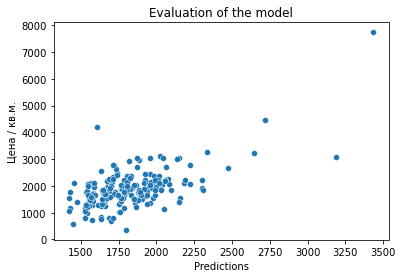

In [72]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of the model")

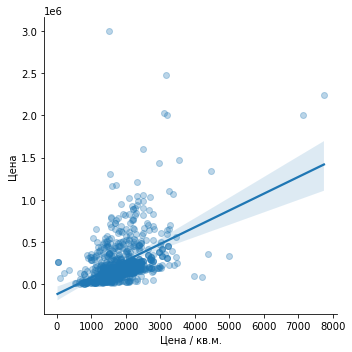

In [73]:
label_encoder_reg = LabelEncoder()
combined_df['Район'] = label_encoder_reg.fit_transform(combined_df['Район'])

sns.lmplot(x='Цена / кв.м.', y='Цена', data=combined_df, scatter_kws={'alpha': 0.3})

## Residuals

In [74]:
residuals = y_test - predictions

In [75]:
# sns.displot(residuals)

In [78]:
r2_score(y_test, y_pred)

0.3261762030034816

<AxesSubplot:xlabel='Цена / кв.м.'>

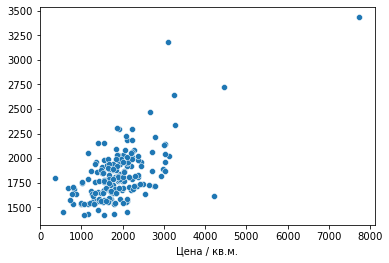

In [80]:
sns.scatterplot(x=y_test, y=y_pred)

## Train model for second_df

In [81]:
second_df

,Район,Едностайни - цена,Едностайни - €/кв.м,Двустайни - цена,Двустайни - €/кв.м,Тристайни - цена,Тристайни - €/кв.м,Общо - €/кв.м,Дата
0,7-ми 11-ти километър,56094.0,1242.0,145502.0,1675.0,189050.0,1756.0,1745,2024-08-13
1,Банишора,49138.0,1134.0,104500.0,1691.0,142310.0,1503.0,1611,2024-08-13
2,Белите брези,38000.0,826.0,82365.0,1157.0,115805.0,1085.0,1157,2024-08-13
3,Бенковски,56094.0,1242.0,85262.0,1511.0,118750.0,1250.0,1351,2024-08-13
4,Борово,49400.0,1045.0,89774.0,1222.0,138890.0,1426.0,1232,2024-08-13
...,...,...,...,...,...,...,...,...,...
1745,с. Лозен,41956.0,762.0,53018.0,762.0,89849.0,834.0,762,2022-01-11
1746,с. Мировяне,56094.0,1242.0,47500.0,863.0,145103.0,1383.0,863,2022-01-11
1747,с. Мърчаево,56094.0,1242.0,26600.0,266.0,35862.0,297.0,297,2022-01-11
1748,с. Панчарево,56094.0,1242.0,76660.0,963.0,131779.0,1132.0,1173,2022-01-11


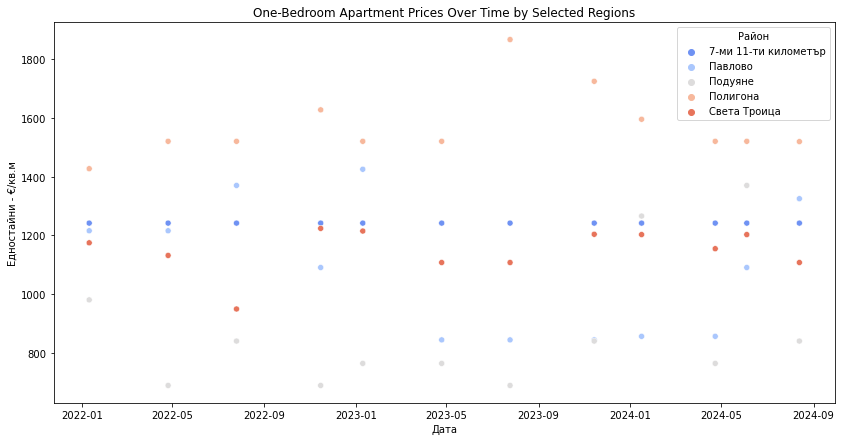

In [82]:
df_one_bed = second_df[['Район', 'Дата', 'Едностайни - €/кв.м', 'Едностайни - цена' ]].copy()

plt.figure(figsize=(14, 7))
top_regions = df_one_bed['Район'].value_counts().nlargest(5).index
df_filtered = df_one_bed[df_one_bed['Район'].isin(top_regions)]

sns.scatterplot(x="Дата", y="Едностайни - €/кв.м", data=df_filtered, hue="Район", palette="coolwarm")
plt.title('One-Bedroom Apartment Prices Over Time by Selected Regions')
plt.show()

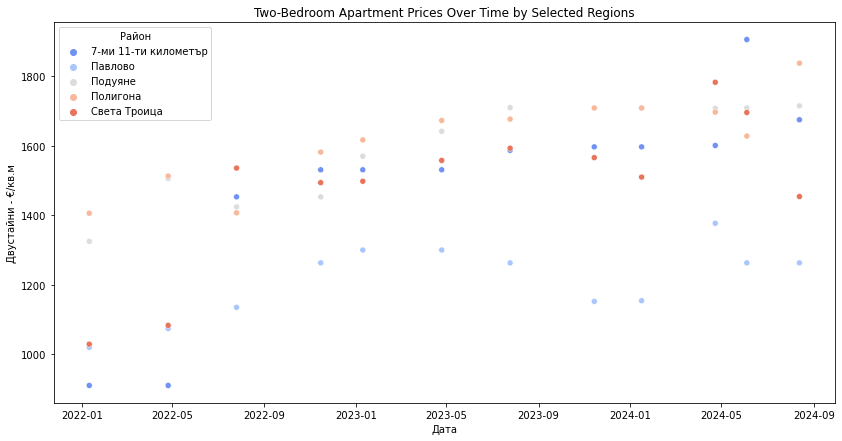

In [83]:
df_two_bed = second_df[['Район', 'Дата', 'Двустайни - €/кв.м', 'Двустайни - цена']].copy()

plt.figure(figsize=(14, 7))
top_regions = df_two_bed['Район'].value_counts().nlargest(5).index
df_filtered = df_two_bed[df_two_bed['Район'].isin(top_regions)]

sns.scatterplot(x="Дата", y="Двустайни - €/кв.м", data=df_filtered, hue="Район", palette="coolwarm")
plt.title('Two-Bedroom Apartment Prices Over Time by Selected Regions')
plt.show()

In [84]:
df_two_bed[df_two_bed['Район'] == 'Полигона']

,Район,Дата,Двустайни - €/кв.м,Двустайни - цена
90,Полигона,2024-08-13,1838.0,130955.0
237,Полигона,2024-06-04,1628.0,111064.0
385,Полигона,2024-04-23,1697.0,111324.0
535,Полигона,2024-01-16,1709.0,111324.0
677,Полигона,2023-11-14,1709.0,117938.0
824,Полигона,2023-07-25,1677.0,114000.0
971,Полигона,2023-04-25,1673.0,113230.0
1120,Полигона,2023-01-10,1617.0,107635.0
1268,Полигона,2022-11-15,1582.0,106020.0
1413,Полигона,2022-07-26,1407.0,97849.0


In [85]:
df_one_bed

,Район,Дата,Едностайни - €/кв.м,Едностайни - цена
0,7-ми 11-ти километър,2024-08-13,1242.0,56094.0
1,Банишора,2024-08-13,1134.0,49138.0
2,Белите брези,2024-08-13,826.0,38000.0
3,Бенковски,2024-08-13,1242.0,56094.0
4,Борово,2024-08-13,1045.0,49400.0
...,...,...,...,...
1745,с. Лозен,2022-01-11,762.0,41956.0
1746,с. Мировяне,2022-01-11,1242.0,56094.0
1747,с. Мърчаево,2022-01-11,1242.0,56094.0
1748,с. Панчарево,2022-01-11,1242.0,56094.0


In [86]:
df_one_bed['Year'] = df_one_bed['Дата'].dt.year
df_one_bed['Month'] = df_one_bed['Дата'].dt.month
df_one_bed.drop(["Дата"], axis=1, inplace=True)

X = df_one_bed.drop(["Едностайни - €/кв.м"], axis=1)
y = df_one_bed["Едностайни - €/кв.м"]

In [87]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['Район'] = label_encoder.fit_transform(X['Район'])

In [88]:
X

,Район,Едностайни - цена,Year,Month
0,0,56094.0,2024,8
1,1,49138.0,2024,8
2,2,38000.0,2024,8
3,3,56094.0,2024,8
4,4,49400.0,2024,8
...,...,...,...,...
1745,152,41956.0,2022,1
1746,154,56094.0,2022,1
1747,156,56094.0,2022,1
1748,157,56094.0,2022,1


In [89]:
y

0       1242.0
1       1134.0
2        826.0
3       1242.0
4       1045.0
         ...  
1745     762.0
1746    1242.0
1747    1242.0
1748    1242.0
1749     771.0
Name: Едностайни - €/кв.м, Length: 1750, dtype: float64

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [91]:
y_train

856     1242.0
1385    1176.0
1133    1447.0
1176    1139.0
985     1403.0
         ...  
776     1488.0
1204    1232.0
1488     841.0
1427    1403.0
1490    1531.0
Name: Едностайни - €/кв.м, Length: 1400, dtype: float64

In [92]:
model.fit(X_train, y_train)

LinearRegression()

In [93]:
y_pred = model.predict(X_test)

In [94]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 103.31506054850597
Mean Squared Error (MSE): 32425.377147687424
Root Mean Squared Error (RMSE): 180.07047827916554


In [95]:
# y_predict
model.coef_

array([-0.1250589 ,  0.02017849,  9.61845485,  1.53359291])

In [96]:
model.intercept_

-19347.759801710934

In [97]:
# second_df.info()

In [98]:
# train_data = X_train.join(y_train)

In [99]:
# train_data.hist(figsize=(15, 8))
# plt.show()

In [100]:
# train_data.corr()

In [101]:
# plt.figure(figsize=(15,8))
# sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [102]:
# np.log(train_data["Едностайни - цена"] + 1)

In [103]:
# train_data['Район'].value_counts()

In [104]:
# dummies = pd.get_dummies(train_data['Район']).astype(int)
# dummies.astype(int)

In [105]:
# train_data = train_data.join(pd.get_dummies(train_data['Район']).astype(int)).drop(['Район'], axis=1)

In [106]:
# train_data

In [107]:
# plt.figure(figsize=(15,8))
# sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [108]:
# subset_columns = ['Едностайни - цена', 'Двустайни - цена', 'Тристайни - цена', 'Общо - €/кв.м']
# plt.figure(figsize=(10,6))
# sns.heatmap(train_data[subset_columns].corr(), annot=True, cmap="YlGnBu")
# plt.show()

In [109]:
# plt.figure(figsize=(15,8))
# sns.scatterplot(x="Двустайни - цена", y="Двустайни - €/кв.м", data=train_data, hue="Двустайни - цена" , palette="coolwarm")

In [110]:
# plt.figure(figsize=(15,8))
# sns.scatterplot(x="Двустайни - цена", y="Двустайни - €/кв.м", data=train_data, hue="Дата", palette="coolwarm")
# plt.show()

In [111]:
combined_df

,Район,Цена,Цена / кв.м.,Валута,Тип Апартамент,Дата,Year,Month,Day
0,1,110201.52,1710.14,EUR,Двустаен апартамент,2022-07-28,2022,7,28
1,3,148125.00,1949.01,EUR,Двустаен апартамент,2022-07-28,2022,7,28
2,5,141912.50,2120.07,EUR,Двустаен апартамент,2022-07-28,2022,7,28
3,6,167608.23,1888.09,EUR,Двустаен апартамент,2022-07-28,2022,7,28
4,7,109764.43,1869.47,EUR,Двустаен апартамент,2022-07-28,2022,7,28
...,...,...,...,...,...,...,...,...,...
949,86,303037.00,1864.02,EUR,Многостаен апартамемент,2024-07-28,2024,7,28
950,92,331999.50,2049.38,EUR,Многостаен апартамемент,2024-07-28,2024,7,28
951,93,446333.00,1410.21,EUR,Многостаен апартамемент,2024-07-28,2024,7,28
952,94,817960.00,2493.78,EUR,Многостаен апартамемент,2024-07-28,2024,7,28


In [112]:
x = combined_df['Район_encoded']
y = combined_df['Цена / кв.м.']

KeyError: 'Район_encoded'

In [ ]:
combined_df[combined_df['Цена / кв.м.'] > 4000]